# 911 Calls

Emergency (911) Calls: Fire, Traffic, EMS (Emergency Medical Services) for Montgomery County, PA

Data from [here](https://www.kaggle.com/mchirico/montcoalert). 

Where:

* lat : str, Latitude
* lng: str, Longitude
* desc: str, Description of the Emergency Call
* zip: str, Zipcode
* title: str, Title
* timeStamp: str, YYYY-MM-DD HH:MM:SS
* twp: str, Township
* addr: str, Address
* e: str, Dummy variable (always 1)

## Data and Setup

____
** Importing libraries and database **

In [1]:
%pylab
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('911.csv')

## Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1


In [6]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


** Top 5 zipcodes for 911 calls**

In [7]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 townships for 911 calls **

In [8]:
df.twp.value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Number of unique title codes **

In [9]:
df.title.nunique()

110

## Call reason analysis 

** Getting "reason" column, from "title" **

In [10]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [11]:
df['reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

** Call reason count **

In [12]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

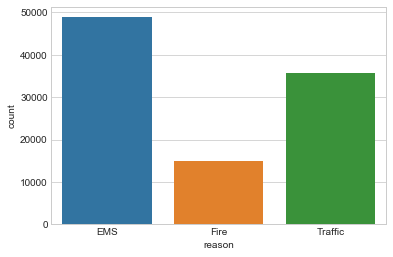

In [13]:
sns.countplot(data=df, x='reason')

## Time stamp info

** Getting hour, month and day of week info from timeStamp **

** Getting also a column with the whole date, without the hour **

In [14]:
df['timeStamp'].head()

0    2015-12-10 17:40:00
1    2015-12-10 17:40:00
2    2015-12-10 17:40:00
3    2015-12-10 17:40:01
4    2015-12-10 17:40:01
Name: timeStamp, dtype: object

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
#dayofweek returns an int 0-6. It is possible to map the string names in one action.
dmap=dict(zip(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))
df['dayofweek'] = df['timeStamp'].apply(lambda x: x.dayofweek).map(dmap)

df['date'] = df['timeStamp'].apply(lambda x: x.date()) #needs a method call

** Routine inspection to check the new columns **

In [17]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


** Countplot by day of week **

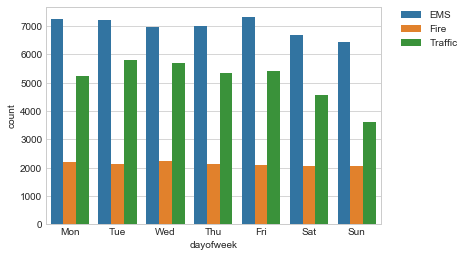

In [18]:
sns.countplot(x='dayofweek', data=df, hue='reason', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Countplot by month **

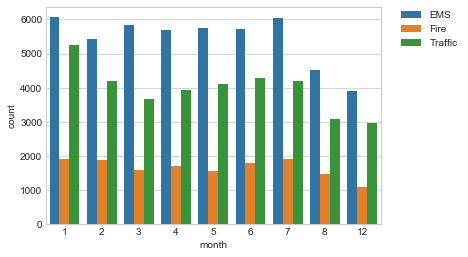

In [19]:
sns.countplot(x='month', data=df, hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
#Months 9-11 are missing...

** Grouping by month **

In [21]:
byMonth = df.groupby('month').count()

In [22]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayofweek,date
month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


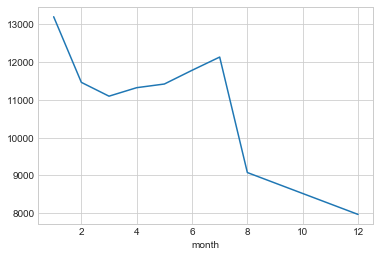

In [23]:
byMonth['reason'].plot()

** Trying a linear fit... **

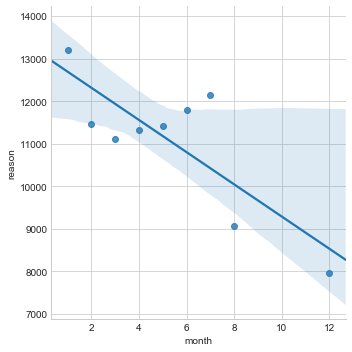

In [24]:
sns.lmplot(x='month', y='reason', data=byMonth.reset_index())

** Plot of 911 calls/day **

In [25]:
byDate = df.groupby('date').count()

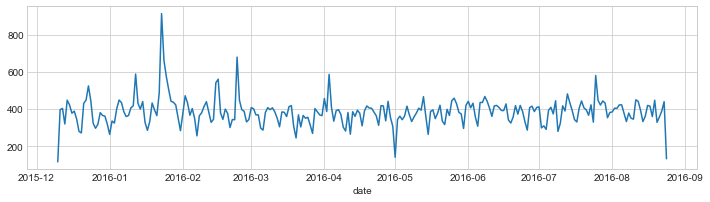

In [26]:
byDate['reason'].plot.line(figsize=(12,3))

** Separated plots of 911 calls/day by reason **

In [27]:
df_reason = df.groupby(by=['date','reason']).count()['twp'].unstack()

'''
Another (uglier) way:
df2 = df[['date','reason']]
df_reason=df2[df2['reason'] == 'EMS'].groupby('date').count()
df_reason['Fire'] = df2[df2['reason'] == 'Fire'].groupby('date').count()
df_reason['Traffic'] = df2[df2['reason'] == 'Traffic'].groupby('date').count()
df_reason.columns = ['EMS', 'Fire', 'Traffic']
'''

df_reason.head()

reason,EMS,Fire,Traffic
date,,,
2015-12-10,57,15,43
2015-12-11,186,68,141
2015-12-12,189,68,146
2015-12-13,190,51,78
2015-12-14,222,38,186


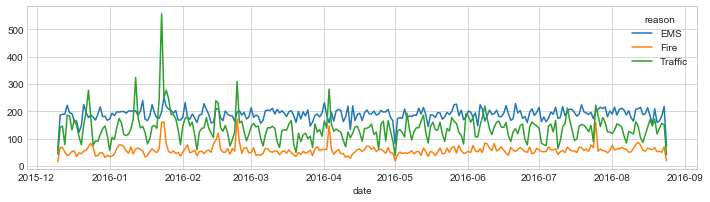

In [28]:
df_reason.plot.line(figsize=(12,3))

** Clustermap by day and hour **

In [29]:
df_day_hour = df.groupby(by=['dayofweek','hour']).count()['reason'].unstack()
df_day_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Sorting days of week **

In [30]:
df_day_hour = df_day_hour.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
df_day_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


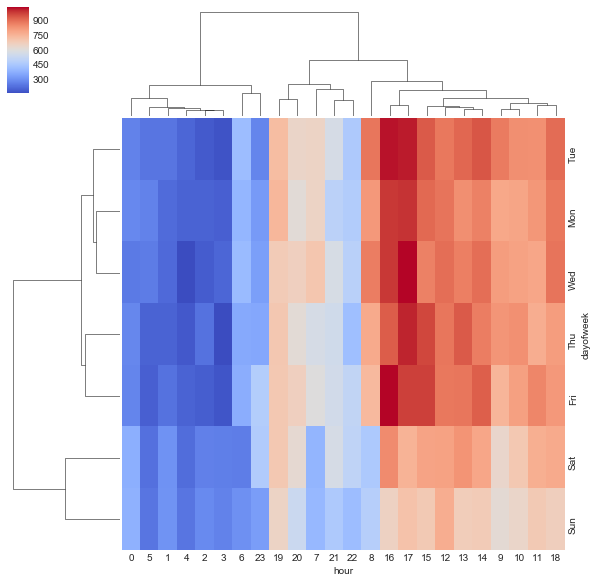

In [43]:
sns.clustermap(df_day_hour, cmap='coolwarm')

** Clustermap by day and month **

In [51]:
df_day_month = df.groupby(by=['dayofweek', 'month']).count()['twp'].unstack()
df_day_month = df_day_month.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [52]:
df_day_month

month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907


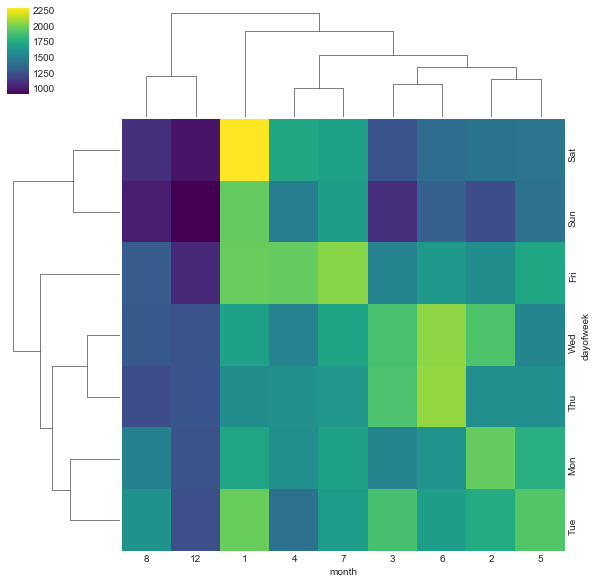

In [53]:
sns.clustermap(df_day_month, cmap='viridis')